# Creates similar-shape csv files from the GLOGEM (only globally necessary) and Marzeion et al. (2012) txt files

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 8)
import os

### GloGEM

In [ ]:
path_glogem = '/home/lilianschuster/glacier-model-standard-projections/GloGEM/'

create_glogem_globally = False
if create_glogem_globally:
    # globally: sum over all RGI regions
    from oggm.utils import mkdir

    ssps_2300 = ['ssp126','ssp534-over', 'ssp585']
    for var in ['volume', 'area']:
        cmip == 'CMIP6' 
        end_years = [2300]
        for end_year in end_years:
            odir = f'{path_glogem}{var}/{cmip}/{end_year}/global/'
            mkdir(odir)
            for scenario in ssps_2300:
                odf = 0
                for n in np.arange(1,20,1):
                    rgi_reg = f'RGI{n:02d}'
                    idir = f'{path_glogem}{var}/{cmip}/{end_year}/{rgi_reg}/'
                    df = pd.read_csv(idir + f'/{scenario}.csv', index_col=0)
                    odf += df
                odf.to_csv(odir + f'/{scenario}.csv')


### Marzeion2020

- [ ] todo: es ist noch was falsch hier ... das relative sollt eimmer über null sein ... 

**global stuff: dV_global_accum_xxx_txt:**
- xxx is the forcing data set (either "cru" or a CMIP5 model run)
- first column is year
- column 2 is the global, temporally accumulated annual sum of glacier mass loss in mm SLE
- column 3 is one standard error of column 2, in mm SLE

**regional stuff: dV_regional_accum_xxx_txt:**
- xxx is the forcing data set (either "cru" or a CMIP5 model run)
- first column is year
- columns 2-20 are regional, temporally accumulated annual sums of glacier mass loss in mm SLE, regions ordered as in table 1
- columns 21-39 are one standard error of columns 2-20, in mm SLE

todo:
- there is no absolute ice volume at any given year from which I could substract the % of remaining ice 
    - at the moment, I manually use data from Mar2012 Table 3
- why is there data from RGI19 ??? 
    - check this
    - make sure, that 

In [2]:
# from MAR2012 Table 5
vol_2009_l_mar_2012_table_3 = [77.3, 3.1, 103.6, 20.8, 27.6,
                               12.8, 22.1, 0.6, 58.8, 0.6, 0.3, 
                               0.2, 15.6, 9.5, 3.8, 0.6, 12.8, 0.2] #, 370.4] global ... 
dict_vol_2009_l_mar_2012_table_3 = {}
v1 = 0
for r,v in enumerate(vol_2009_l_mar_2012_table_3):
    r+=1
    #print(r)
    if r==19:
        # the last entry is the global one excluding rgi19
        name = 'global_no_rgi19'
    else:
        name = f'rgi{r:02}'
    v1 = v1+v 
    dict_vol_2009_l_mar_2012_table_3[name] = v

In [3]:
# numbers from compute_slr function from oggm-edu glacier explorer 
rho_oc = 1028
A_oc = 362.5 * 1e9
cte_gt_to_slr_mm = 1e12/(A_oc*rho_oc)  # Gt / mm SLR
cte_slr_mm_to_gt = 1/cte_gt_to_slr_mm # Gt / mm SLR
# approximately, maybe need to check with Ben 
#sigma_slr_glac_models = sigma_mass_loss_2020 * cte_gt_to_slr_mm 
#SLR = (mass_2020 - mass_yr)*cte
# mass_ch_diff_2015 = cte_slr_mm_to_gt * SLE

In [4]:
mar2012_path = 'tc-6-1295-2012-supplement'
files_mar2012 = os.listdir(mar2012_path)

gcms = []
files_mar2012_sel = []
for f in files_mar2012:
    if ('regional' in f) and ('accum' in f) and ('cru' not in f):
        gcms.append(f.split('_')[3])
        files_mar2012_sel.append(f)

gcms = list(set(gcms))
#files_mar2012.remove('readme.txt')
#files_mar2012.remove('.ipynb_checkpoint')

In [5]:
import oggm
rcps = ['26','45','60','85']

column_names = ['Year']
for n in np.arange(1,20,1):
    column_names.append(f'vol_m3_rgi{n:02d}') # we will convert it from acccumulated mm SLE to that ... 
    oggm.utils.mkdir(f'Mar2012/volume/CMIP5/2300/RGI{n:02d}')
    oggm.utils.mkdir(f'Mar2012/volume/CMIP5/2100/RGI{n:02d}')

for n in np.arange(1,20,1):
    column_names.append(f'rel_2020_std_error_rgi{n:02d}')

/home/lilianschuster/anaconda3/envs/oggm_v16/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [6]:
f_cru = 'dV_regional_accum_cru.txt'

In [7]:
pd_cru_accum = pd.read_csv(mar2012_path + '/' +f_cru, sep='\s+',
                                     names=column_names)

In [10]:
pd_cru_accum_2000_onwards = pd_cru_accum.loc[pd_cru_accum.Year>=2000]

In [20]:
pd_cru_accum_2000_onwards =pd_cru_accum_2000_onwards.set_index('Year')

In [18]:
t_reg.loc[2000:][list(t_reg.columns[:18].values)]  - t_reg.loc[2009][list(t_reg.columns[:18].values)]

,vol_m3_rgi01,vol_m3_rgi02,vol_m3_rgi03,vol_m3_rgi04,vol_m3_rgi05,vol_m3_rgi06,vol_m3_rgi07,vol_m3_rgi08,vol_m3_rgi09,vol_m3_rgi10,vol_m3_rgi11,vol_m3_rgi12,vol_m3_rgi13,vol_m3_rgi14,vol_m3_rgi15,vol_m3_rgi16,vol_m3_rgi17,vol_m3_rgi18
Year,,,,,,,,,,,,,,,,,,
2000.0,-1.029054,-0.227403,-0.978069,-0.499058,-1.042130,-0.132432,-0.777489,-0.030970,-0.662865,-0.020540,-0.060429,-0.018945,-0.500457,-0.334608,-0.215881,-0.106884,-0.310958,-0.010883
2001.0,-0.970839,-0.202865,-1.003225,-0.493068,-0.964215,-0.126414,-0.697778,-0.019381,-0.471368,-0.020134,-0.039865,-0.016683,-0.427889,-0.285585,-0.197693,-0.090722,-0.265136,-0.012220
2002.0,-0.829492,-0.159225,-0.831858,-0.377402,-0.853847,-0.119042,-0.636420,-0.016034,-0.434990,-0.017864,-0.031578,-0.013700,-0.377462,-0.242988,-0.178048,-0.079649,-0.244191,-0.010712
2003.0,-0.791101,-0.145913,-0.707564,-0.332254,-0.687907,-0.098531,-0.565374,-0.012632,-0.385282,-0.016063,-0.030263,-0.011483,-0.329732,-0.214281,-0.142576,-0.069510,-0.198160,-0.009652
2004.0,-0.703559,-0.128332,-0.658661,-0.280948,-0.535386,-0.082639,-0.531554,-0.011839,-0.376176,-0.012646,-0.022511,-0.010472,-0.287663,-0.193686,-0.131441,-0.055784,-0.162666,-0.007494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296.0,75.916608,3.032422,107.809605,20.612168,24.958394,13.260967,14.856352,0.553721,62.353184,0.629420,0.319741,0.155456,15.668024,8.594603,3.894623,0.683251,12.893183,0.174129
2297.0,75.945806,3.032422,107.809605,20.612168,24.960309,13.260967,14.856352,0.553721,62.353184,0.629823,0.319741,0.155456,15.670120,8.605965,3.895237,0.683251,12.893908,0.174129
2298.0,75.970158,3.032422,107.809605,20.612168,24.962635,13.260967,14.856352,0.553721,62.353184,0.630246,0.319741,0.155456,15.672160,8.616416,3.895840,0.683251,12.895023,0.174129


In [12]:
dict_rcp = {}
for _rcp in rcps:
    RCP = f'rcp{_rcp}'
    dict_gcm_reg = {}
    for n in np.arange(1,19,1):
        dict_gcm_reg[f'RGI{n:02d}']=pd.DataFrame(index=np.arange(2000,2302))
    for GCM in gcms: 
        for f in files_mar2012_sel:
            #if ('global' in f) and ('accum' in f):
            #    t_glob = pd.read_csv(mar2012_path + '/' +f, sep='\s+',
            #                         names=['Year', 'mass_mm_sle','mass_mm_sle_std_error'])
            gcm = f.split('_')[3]
            rcp = f.split('_')[4]
            if ('regional' in f) and ('accum' in f) and (GCM == gcm) and (RCP==rcp):
                #print(f)
                t_reg = pd.read_csv(mar2012_path + '/' +f, sep='\s+',
                                     names=column_names)
                t_reg = t_reg.set_index('Year')
                # cumulative mm sle changes relative to 2009 
                cum_mm_sle_rel_2009 = t_reg.loc[2009:][list(t_reg.columns[:18].values)]  - t_reg.loc[2009][list(t_reg.columns[:18].values)]
                # mass loss of 2009 is for the year 2009, 
                # Mass in mm sle in 2009 - 
                t_reg_2010 = vol_2009_l_mar_2012_table_3 - cum_mm_sle_rel_2009  # it is mass loss, so it should be negative ...
                # use the values from 2000 to 2009 from CRU 
                t_reg.loc[2000:2009] = pd_cru_accum_2000_onwards.loc[2000:2009]
                # t_reg_2010.index  = t_reg_2010.index.values +1
                vol_m3 = t_reg_2010*cte_slr_mm_to_gt * 1e12 / 900 # gt in kg  in m3 (900 kg/m3)
                vol_rel_2020 = (100*t_reg_2010)/(t_reg_2010.loc[2020])
                for n in np.arange(1,19,1):
                    dict_gcm_reg[f'RGI{n:02d}'].loc[vol_m3.index, gcm] = vol_m3[f'vol_m3_rgi{n:02d}'].values
    dict_rcp[RCP] = dict_gcm_reg
    # dV_regional_{}_rcp{rcp}.txt

In [61]:
for _rcp in rcps:
    for n in np.arange(1,19,1):
        RCP = f'rcp{_rcp}'
        dict_rcp_sel = dict_rcp[RCP]
        dict_gcm_rcp_reg_sel = dict_rcp_sel[f'RGI{n:02d}']
        dict_gcm_rcp_reg_sel_2300 = dict_gcm_rcp_reg_sel.dropna(axis=1,thresh=250)
        dict_gcm_rcp_reg_sel_2100 = dict_gcm_rcp_reg_sel.loc[:2100]
        dict_gcm_rcp_reg_sel_2300.to_csv(f'Mar2012/volume/CMIP5/2300/RGI{n:02d}/{RCP}.csv')
        dict_gcm_rcp_reg_sel_2100.to_csv(f'Mar2012/volume/CMIP5/2100/RGI{n:02d}/{RCP}.csv')

,vol_m3_rgi01,vol_m3_rgi02,vol_m3_rgi03,vol_m3_rgi04,vol_m3_rgi05,vol_m3_rgi06,vol_m3_rgi07,vol_m3_rgi08,vol_m3_rgi09,vol_m3_rgi10,...,rel_2020_std_error_rgi10,rel_2020_std_error_rgi11,rel_2020_std_error_rgi12,rel_2020_std_error_rgi13,rel_2020_std_error_rgi14,rel_2020_std_error_rgi15,rel_2020_std_error_rgi16,rel_2020_std_error_rgi17,rel_2020_std_error_rgi18,rel_2020_std_error_rgi19
Year,,,,,,,,,,,,,,,,,,,,,
1850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1851.0,-0.009660,0.014944,-0.053910,0.016866,-0.027954,-0.000835,0.041841,0.004355,0.458407,0.007070,...,0.014141,0.007961,0.003933,0.644401,0.082970,0.031958,0.352696,0.071738,0.007049,1.151211
1852.0,-0.023185,0.013546,0.544928,0.155719,-0.137779,-0.015423,0.111076,0.012580,1.211768,0.005575,...,0.014058,0.007929,0.003920,0.617300,0.082666,0.031838,0.348376,0.071331,0.006992,1.141794
1853.0,-0.050377,0.135491,1.089921,0.117581,0.011466,-0.022448,0.141369,0.024701,1.523600,0.004422,...,0.014010,0.007877,0.003907,0.589815,0.082362,0.031719,0.348360,0.070924,0.006931,1.126320
1854.0,0.003874,0.184552,0.952274,0.210784,0.639954,-0.031254,0.168826,0.020339,2.016210,0.002261,...,0.013961,0.007837,0.003895,0.564675,0.082056,0.031598,0.348344,0.070671,0.006869,1.111623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296.0,80.559345,6.593845,112.775080,26.173360,35.588684,13.576365,23.285880,0.826804,91.061284,0.899955,...,0.016177,0.004986,0.002475,0.065171,0.084861,0.024952,0.006360,0.081125,0.003554,3.460940
2297.0,80.608043,6.593845,112.838670,26.173755,35.586676,13.576366,23.285880,0.826804,91.078216,0.900101,...,0.016199,0.004986,0.002475,0.065188,0.084927,0.024961,0.006360,0.081249,0.003554,3.462025
2298.0,80.645879,6.593845,112.903590,26.174052,35.585766,13.576366,23.285880,0.826804,91.067282,0.900238,...,0.016229,0.004986,0.002475,0.065206,0.084991,0.024970,0.006360,0.081359,0.003554,3.462796


### Short analysis 


In [62]:
# IPCC colors from: https://pyam-iamc.readthedocs.io/en/stable/tutorials/ipcc_colors.html
colors_scenario = {# AR6 ssps (from CMIP6)
                    'ssp119':'#00a9cf', 'ssp126': '#003466',
                   'ssp245':'#f69320', 'ssp370':'#df0000',
                   'ssp434':'#2274ae',
                  'ssp460': '#b0724e', 'ssp534-over':'#92397a',
                  'ssp585':'#980002',
                   # AR5 rcp colors
                  #'rcp26': '#0000FF', 'rcp45':'#79BCFF', 'rcp60':'#FF822D', 'rcp85':'#FF0000',
                  # AR6 rcp colors
                  'rcp26': '#003466', 'rcp45':'#709fcc', 'rcp60':'#c37900', 'rcp85':'#980002'}

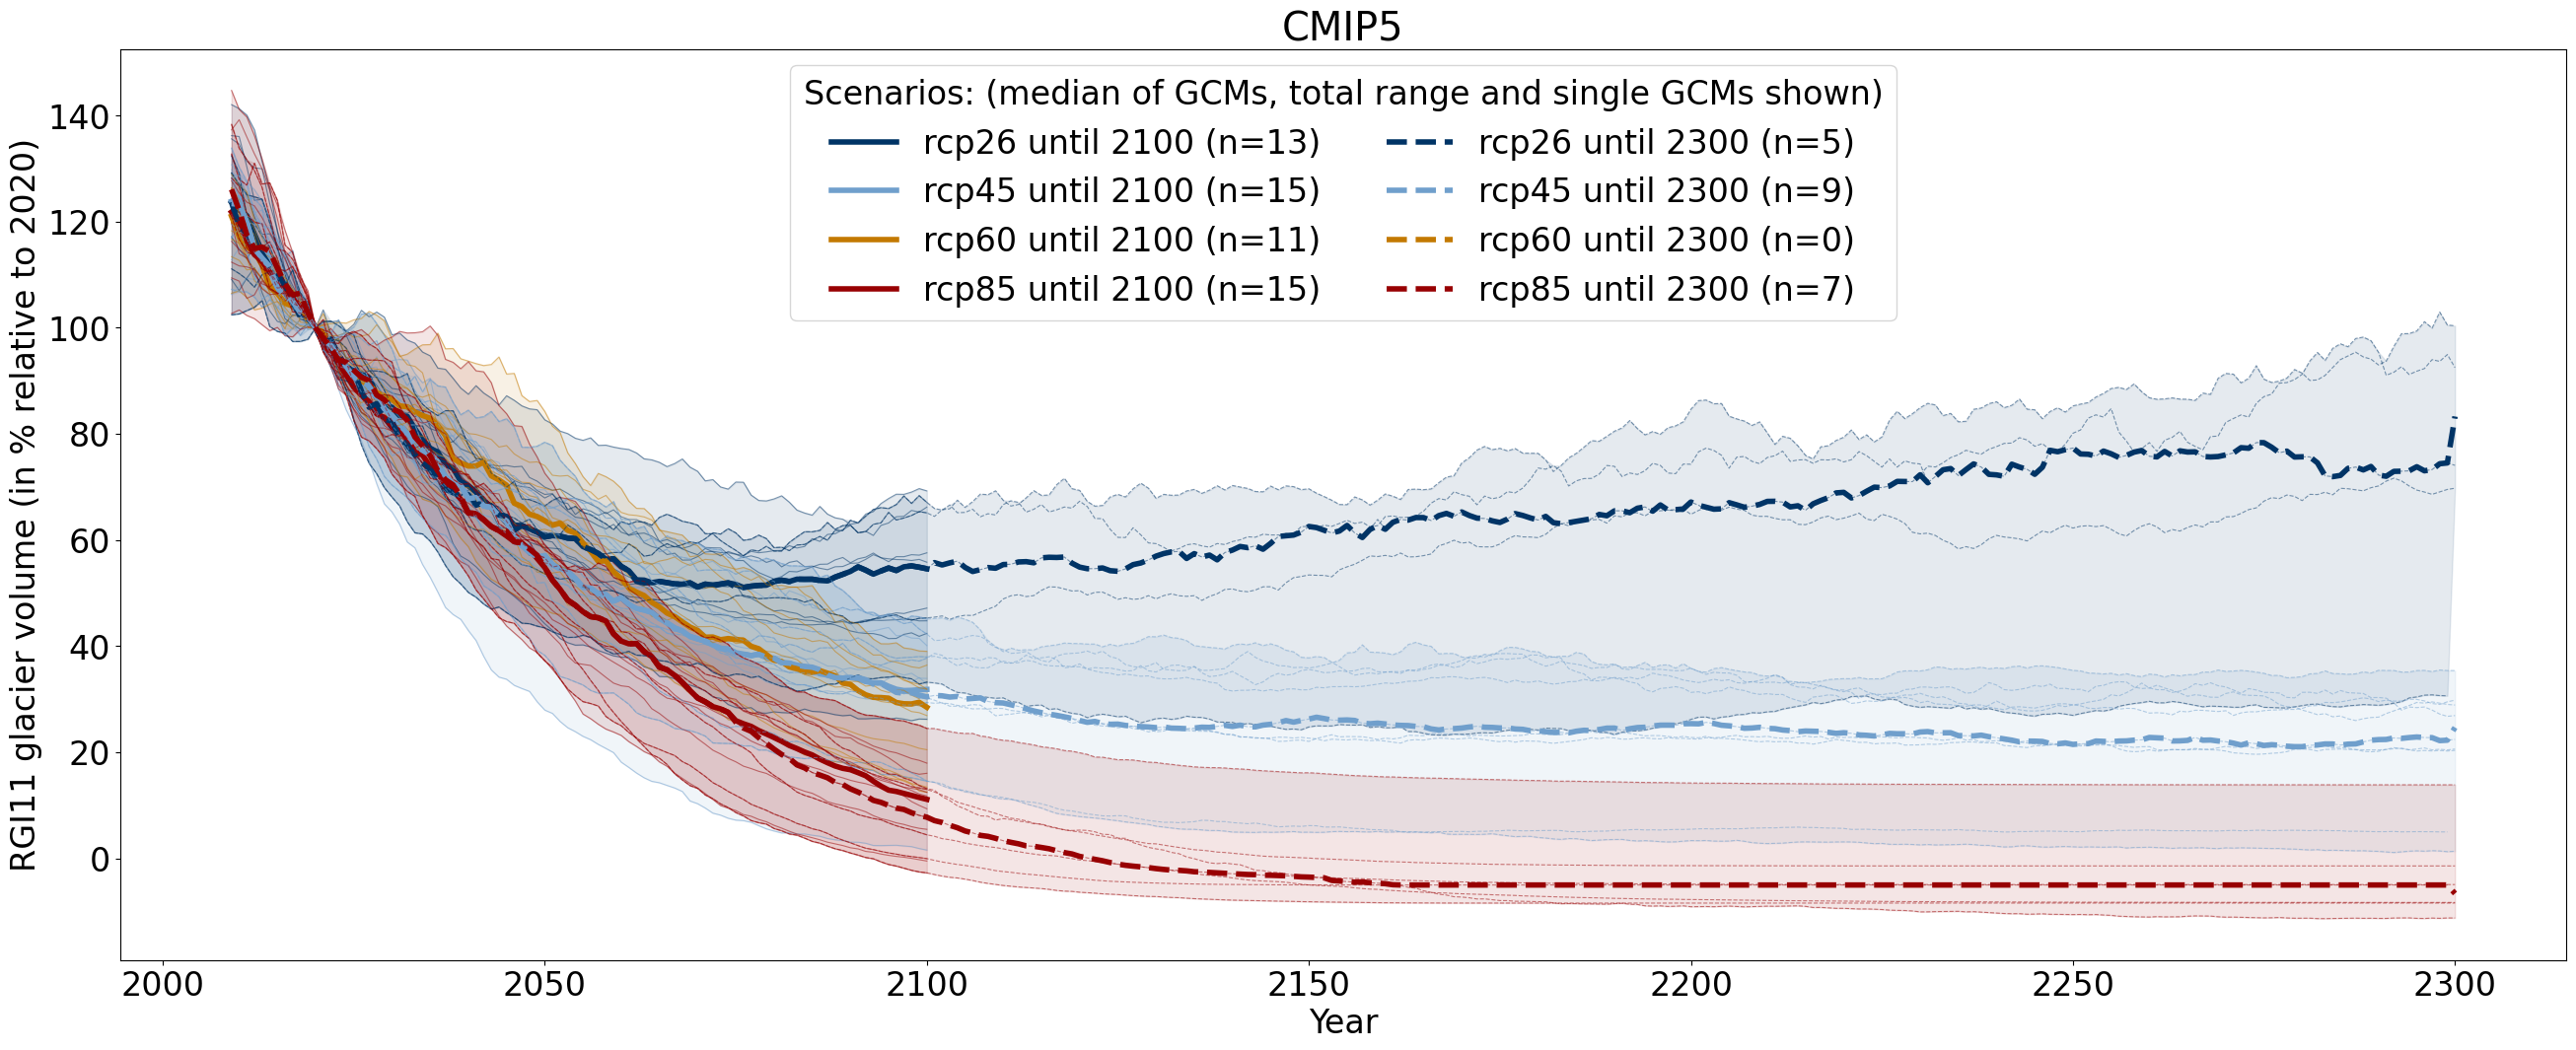

In [64]:
path = '/home/lilianschuster/glacier-model-standard-projections/Mar2012/'
rgi = 'RGI11'
plt.rc('font', size=24)
end_year= 2100
ls_d = {2100:'-', 2300:'--'}
plt.figure(figsize=(32,12)) #harey=True, sharex=True)
for j,cmip in enumerate(['CMIP5']):
    ax = plt.gca()
    for end_year in [2100,2300]:
        ls = ls_d[end_year]
        # let's only plot those scenarios that exist only until 2300
        #scenario_list = list(df_meta.loc[(df_meta.cmip==cmip) & (df_meta.end_year==2300)].scenario.unique())
        #scenario_list.sort()
        for _rcp in rcps:
            scenario = f'rcp{_rcp}'
            #for scenario in scenario_list:
            idir = path + f'volume/{cmip}/{end_year}/{rgi}/'

            df = pd.read_csv(idir + f'{scenario}.csv', index_col=0)
            df_rel = 100*df/df.loc[2000]

            ax.plot(df.index, df_rel.median(axis=1), lw=4, color=colors_scenario[scenario],
                    label = f'{scenario} until {end_year} (n={len(df_rel.columns)})', ls= ls_d[end_year])
            ax.plot(df.index, df_rel, lw=0.8, alpha = 0.5, color=colors_scenario[scenario],
                   ls= ls_d[end_year]);
            ax.fill_between(df.index, df_rel.min(axis=1), df_rel.max(axis=1), alpha=0.1, color=colors_scenario[scenario])

            ax.set_ylabel(f'{rgi} glacier volume (in % relative to 2020)')
            ax.set_xlabel('Year')
            #if end_year == 2300:
            #    df_rel_2300.loc[f'{cmip}\n{scenario}:\nn={len(df_rel.columns)}', df_rel.columns] = df_rel.loc[2299]
        #if end_year == 2100:
    plt.legend(title='Scenarios: (median of GCMs, total range and single GCMs shown)', ncol=2);

    ax.set_title(cmip)
    #plt.savefig('global_glacier_volume_until2300_common_running_2100_2300_cmip5_mar2012.png')

In [110]:
for n in np.arange(1,19,1):
    vol_rel_2020[f'rel_2020_rgi{n:02d}']

,rel_2020_rgi01,rel_2020_rgi02,rel_2020_rgi03,rel_2020_rgi04,rel_2020_rgi05,rel_2020_rgi06,rel_2020_rgi07,rel_2020_rgi08,rel_2020_rgi09,rel_2020_rgi10,rel_2020_rgi11,rel_2020_rgi12,rel_2020_rgi13,rel_2020_rgi14,rel_2020_rgi15,rel_2020_rgi16,rel_2020_rgi17,rel_2020_rgi18
2010.0,105.289542,41.309131,101.680893,106.441515,112.520021,101.343307,115.882634,106.672516,108.927648,111.260585,193.149938,112.649313,170.458751,30.105159,52.680909,97.806121,107.207290,97.206054
2011.0,104.482059,52.837750,101.432831,105.610882,111.654018,101.265586,113.863933,105.037942,106.747421,110.339966,177.881858,111.953400,164.747127,33.615641,55.075728,98.147721,106.561156,97.256456
2012.0,103.734115,59.950181,101.397307,104.862686,109.817411,101.141377,113.486689,105.175603,106.528781,108.036356,147.651827,110.941409,156.500072,40.289675,60.125921,98.419806,105.056396,97.503573
2013.0,103.243305,63.123291,101.153097,103.952509,106.374132,101.239001,112.042748,105.886771,106.156518,107.249772,141.276687,109.567914,148.713971,48.161046,60.857820,98.581134,104.572785,97.807710
2014.0,102.765224,67.019302,101.087384,104.245757,106.648192,100.999499,109.092994,103.732603,105.780544,106.975714,140.744992,107.935213,142.596033,56.286010,69.098277,98.768264,104.431424,98.154070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
vol_rel_2020

,mass_mm_sle_rgi01,mass_mm_sle_rgi02,mass_mm_sle_rgi03,mass_mm_sle_rgi04,mass_mm_sle_rgi05,mass_mm_sle_rgi06,mass_mm_sle_rgi07,mass_mm_sle_rgi08,mass_mm_sle_rgi09,mass_mm_sle_rgi10,mass_mm_sle_rgi11,mass_mm_sle_rgi12,mass_mm_sle_rgi13,mass_mm_sle_rgi14,mass_mm_sle_rgi15,mass_mm_sle_rgi16,mass_mm_sle_rgi17,mass_mm_sle_rgi18
2010.0,1.035718,0.907486,1.021487,1.064693,1.104006,1.012540,1.171998,1.135163,1.091987,1.366272,0.458571,1.152038,0.504878,0.765744,0.918142,0.979477,1.049977,0.972981
2011.0,1.032035,0.917991,1.018797,1.060670,1.071112,1.010972,1.159108,1.121045,1.084373,1.353196,0.507260,1.123946,0.560718,0.785898,0.924346,0.981298,1.044285,0.976395
2012.0,1.028460,0.927212,1.016253,1.052528,1.061278,1.010879,1.148400,1.090266,1.083111,1.313246,0.538556,1.124057,0.586582,0.807580,0.934907,0.983199,1.041765,0.980702
2013.0,1.024905,0.934354,1.013520,1.044496,1.044243,1.009233,1.147071,1.111961,1.082403,1.275640,0.625248,1.112616,0.638956,0.830890,0.944092,0.984493,1.037229,0.983878
2014.0,1.022552,0.940037,1.010550,1.039554,1.040131,1.007842,1.139971,1.120126,1.076235,1.237692,0.690748,1.098950,0.673448,0.842362,0.951973,0.986222,1.033989,0.989417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
t_reg[t_reg.columns[:18]].T.sum()#['mass_mm_sle_rgi19']

Year
1850.0    0.000000
1851.0    1.057759
1852.0    1.873167
1853.0    3.043492
1854.0    4.661363
            ...   
2296.0    0.000000
2297.0    0.000000
2298.0    0.000000
2299.0    0.000000
2300.0    0.000000
Length: 451, dtype: float64

In [10]:
vol_2009_l_mar_2012_table_3 #- t_reg.loc[2009:] 

[77.3,
 3.1,
 103.6,
 20.8,
 27.6,
 12.8,
 22.1,
 0.6,
 58.8,
 0.6,
 0.3,
 0.2,
 15.6,
 9.5,
 3.8,
 0.6,
 12.8,
 0.2,
 370.4]

In [6]:
t_reg.loc[2009:]

,mass_mm_sle_rgi01,mass_mm_sle_rgi02,mass_mm_sle_rgi03,mass_mm_sle_rgi04,mass_mm_sle_rgi05,mass_mm_sle_rgi06,mass_mm_sle_rgi07,mass_mm_sle_rgi08,mass_mm_sle_rgi09,mass_mm_sle_rgi10,...,mass_mm_sle_std_error_rgi10,mass_mm_sle_std_error_rgi11,mass_mm_sle_std_error_rgi12,mass_mm_sle_std_error_rgi13,mass_mm_sle_std_error_rgi14,mass_mm_sle_std_error_rgi15,mass_mm_sle_std_error_rgi16,mass_mm_sle_std_error_rgi17,mass_mm_sle_std_error_rgi18,mass_mm_sle_std_error_rgi19
Year,,,,,,,,,,,,,,,,,,,,,
2009.0,15.527142,6.645275,9.940913,6.724179,14.973726,1.216201,12.072046,0.372145,16.851459,0.470657,...,0.003250,0.001247,0.000775,0.016544,0.017382,0.006263,0.002705,0.015287,0.002274,0.057029
2010.0,15.746794,6.686316,10.187551,6.777365,15.349928,1.234141,12.182338,0.374979,17.143947,0.471895,...,0.003423,0.001345,0.000828,0.017426,0.018425,0.006637,0.002857,0.016205,0.002306,0.061694
2011.0,15.960032,6.722337,10.420841,6.885006,15.462391,1.235205,12.273959,0.381157,17.192440,0.475677,...,0.003589,0.001433,0.000872,0.018255,0.019410,0.006989,0.003002,0.017068,0.002338,0.066007
2012.0,16.172039,6.750241,10.671413,6.991185,15.657219,1.254037,12.285332,0.376802,17.219615,0.479237,...,0.003746,0.001522,0.000919,0.019052,0.020345,0.007321,0.003132,0.017889,0.002369,0.070050
2013.0,16.312375,6.772441,10.943725,7.056521,15.704242,1.269949,12.346081,0.375163,17.456575,0.482830,...,0.003897,0.001603,0.000963,0.019811,0.021236,0.007639,0.003261,0.018672,0.002401,0.073884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2297.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [5]:
vol_2009_l_mar_2012_table_3

[77.3,
 3.1,
 103.6,
 20.8,
 27.6,
 12.8,
 22.1,
 0.6,
 58.8,
 0.6,
 0.3,
 0.2,
 15.6,
 9.5,
 3.8,
 0.6,
 12.8,
 0.2,
 370.4]

In [84]:
t_reg_2010

,mass_mm_sle_rgi01,mass_mm_sle_rgi02,mass_mm_sle_rgi03,mass_mm_sle_rgi04,mass_mm_sle_rgi05,mass_mm_sle_rgi06,mass_mm_sle_rgi07,mass_mm_sle_rgi08,mass_mm_sle_rgi09,mass_mm_sle_rgi10,...,mass_mm_sle_std_error_rgi10,mass_mm_sle_std_error_rgi11,mass_mm_sle_std_error_rgi12,mass_mm_sle_std_error_rgi13,mass_mm_sle_std_error_rgi14,mass_mm_sle_std_error_rgi15,mass_mm_sle_std_error_rgi16,mass_mm_sle_std_error_rgi17,mass_mm_sle_std_error_rgi18,mass_mm_sle_std_error_rgi19
2010.0,354.872858,363.754725,360.459087,363.675821,355.426274,369.183798,358.327954,370.027855,353.548541,369.929343,...,370.396750,370.398753,370.399225,370.383456,370.382618,370.393737,370.397295,370.384713,370.397726,370.342971
2011.0,354.653206,363.713684,360.212449,363.622635,355.050072,369.165859,358.217662,370.025021,353.256053,369.928105,...,370.396577,370.398655,370.399172,370.382574,370.381575,370.393363,370.397143,370.383795,370.397694,370.338306
2012.0,354.439968,363.677663,359.979159,363.514994,354.937609,369.164795,358.126041,370.018843,353.207560,369.924323,...,370.396411,370.398567,370.399128,370.381745,370.380590,370.393011,370.396998,370.382932,370.397662,370.333993
2013.0,354.227961,363.649759,359.728587,363.408816,354.742781,369.145963,358.114668,370.023198,353.180385,369.920763,...,370.396254,370.398478,370.399081,370.380948,370.379655,370.392679,370.396868,370.382111,370.397631,370.329950
2014.0,354.087625,363.627559,359.456275,363.343480,354.695758,369.130051,358.053919,370.024837,352.943425,369.917170,...,370.396103,370.398397,370.399037,370.380189,370.378764,370.392361,370.396739,370.381328,370.397599,370.326116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.400000
2298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.400000
2299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.400000
2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.400000


,mass_loss_mm_sle_rgi01,mass_loss_mm_sle_rgi02,mass_loss_mm_sle_rgi03,mass_loss_mm_sle_rgi04,mass_loss_mm_sle_rgi05,mass_loss_mm_sle_rgi06,mass_loss_mm_sle_rgi07,mass_loss_mm_sle_rgi08,mass_loss_mm_sle_rgi09,mass_loss_mm_sle_rgi10,...,mass_loss_mm_sle_std_error_rgi10,mass_loss_mm_sle_std_error_rgi11,mass_loss_mm_sle_std_error_rgi12,mass_loss_mm_sle_std_error_rgi13,mass_loss_mm_sle_std_error_rgi14,mass_loss_mm_sle_std_error_rgi15,mass_loss_mm_sle_std_error_rgi16,mass_loss_mm_sle_std_error_rgi17,mass_loss_mm_sle_std_error_rgi18,mass_loss_mm_sle_std_error_rgi19
2010.0,385.927142,377.045275,380.340913,377.124179,385.373726,371.616201,382.472046,370.772145,387.251459,370.870657,...,370.403250,370.401247,370.400775,370.416544,370.417382,370.406263,370.402705,370.415287,370.402274,370.457029
2011.0,386.146794,377.086316,380.587551,377.177365,385.749928,371.634141,382.582338,370.774979,387.543947,370.871895,...,370.403423,370.401345,370.400828,370.417426,370.418425,370.406637,370.402857,370.416205,370.402306,370.461694
2012.0,386.360032,377.122337,380.820841,377.285006,385.862391,371.635205,382.673959,370.781157,387.592440,370.875677,...,370.403589,370.401433,370.400872,370.418255,370.419410,370.406989,370.403002,370.417068,370.402338,370.466007
2013.0,386.572039,377.150241,381.071413,377.391184,386.057219,371.654037,382.685332,370.776802,387.619615,370.879237,...,370.403746,370.401522,370.400919,370.419052,370.420345,370.407321,370.403132,370.417889,370.402369,370.470050
2014.0,386.712375,377.172441,381.343725,377.456520,386.104242,371.669949,382.746081,370.775163,387.856575,370.882830,...,370.403897,370.401603,370.400963,370.419811,370.421236,370.407639,370.403261,370.418672,370.402401,370.473884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.400000
2298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.400000
2299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.400000
2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.400000


In [57]:
100*t_reg/t_reg.loc[2020.0]

,mass_loss_mm_sle_rgi01,mass_loss_mm_sle_rgi02,mass_loss_mm_sle_rgi03,mass_loss_mm_sle_rgi04,mass_loss_mm_sle_rgi05,mass_loss_mm_sle_rgi06,mass_loss_mm_sle_rgi07,mass_loss_mm_sle_rgi08,mass_loss_mm_sle_rgi09,mass_loss_mm_sle_rgi10,...,mass_loss_mm_sle_std_error_rgi10,mass_loss_mm_sle_std_error_rgi11,mass_loss_mm_sle_std_error_rgi12,mass_loss_mm_sle_std_error_rgi13,mass_loss_mm_sle_std_error_rgi14,mass_loss_mm_sle_std_error_rgi15,mass_loss_mm_sle_std_error_rgi16,mass_loss_mm_sle_std_error_rgi17,mass_loss_mm_sle_std_error_rgi18,mass_loss_mm_sle_std_error_rgi19
Year,,,,,,,,,,,,,,,,,,,,,
2000.0,77.578924,90.392806,67.845022,77.989110,74.731672,72.157245,72.951756,76.164083,72.569492,87.029602,...,31.965050,56.308425,48.041266,32.105342,40.227794,40.577567,42.799175,39.830936,75.205269,54.747731
2001.0,78.281717,90.455543,67.523661,77.759046,75.288988,73.477026,74.592084,76.618857,74.118441,87.545943,...,22.591605,50.314841,41.765664,22.700229,32.825287,33.105812,34.666687,32.579275,76.731904,49.154321
2002.0,78.996587,90.836969,67.236451,78.637884,76.590917,75.065774,76.187168,77.474940,74.716362,87.679254,...,31.933773,43.440389,33.901878,32.086963,23.195376,23.396229,24.231077,23.209865,78.211069,42.883736
2003.0,79.724837,91.369192,68.780973,79.647597,79.986615,77.100973,78.675220,78.342963,75.723301,88.343772,...,39.082424,35.335490,24.279381,39.277260,32.776495,32.966935,34.135284,32.752938,79.645212,43.042215
2004.0,82.114146,92.430297,71.598949,81.072511,80.901395,78.338644,79.959310,81.897331,78.934357,88.876332,...,45.108606,24.920930,34.281554,45.320240,40.120936,40.381070,41.553349,40.128839,81.049132,43.239402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2297.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
